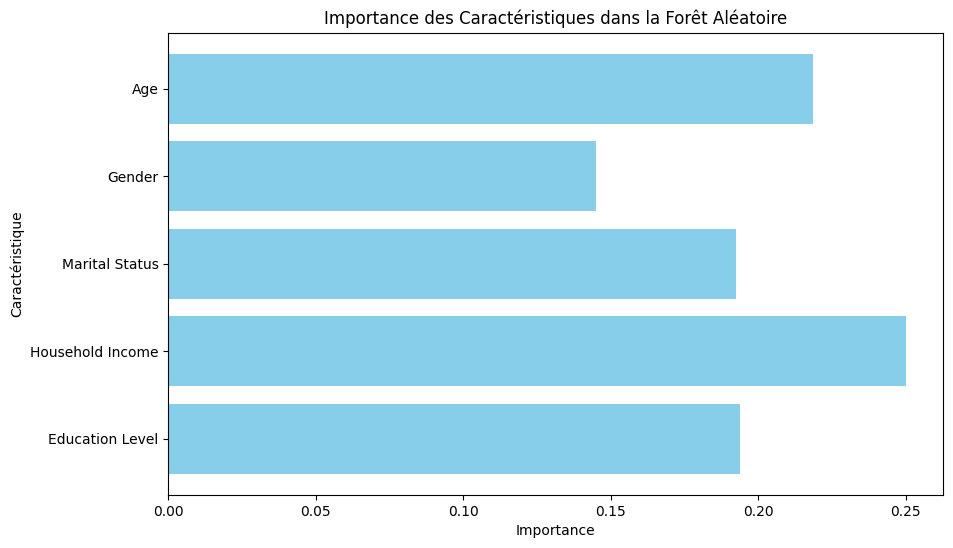

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data = pd.read_csv("archive/GACTT_RESULTS_ANONYMIZED.csv")

selected_columns = [
    "What is your age?", "Gender", "Marital Status", 
    "Household Income", "Education Level", 
    "How many cups of coffee do you typically drink per day?"
]

selected_data = data[selected_columns].copy()

selected_data.rename(columns={
    "What is your age?": "Age",
    "How many cups of coffee do you typically drink per day?": "Coffee Per Day"
}, inplace=True)

for col in selected_data.columns:
    selected_data[col].fillna(selected_data[col].mode()[0], inplace=True)

label_encoders = {}
for col in selected_data.columns[:-1]: 
    encoder = LabelEncoder()
    selected_data[col] = encoder.fit_transform(selected_data[col])
    label_encoders[col] = encoder

selected_data['Coffee Per Day'] = selected_data['Coffee Per Day'].apply(lambda x: 0 if x in ["0", "1", "2"] else 1)

X = selected_data.drop('Coffee Per Day', axis=1)
y = selected_data['Coffee Per Day']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)

feature_names = X.columns
feature_importance = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Caractéristique')
plt.title('Importance des Caractéristiques dans la Forêt Aléatoire')
plt.gca().invert_yaxis() 
plt.show()
